In [15]:
import random
import json
import torch
from utils import SAMPLE_RATE, load_audio
import matplotlib.pyplot as plt
from IPython.display import Audio, display

In [16]:
def play_audio(waveform):
    display(Audio(data=waveform, rate=16000))

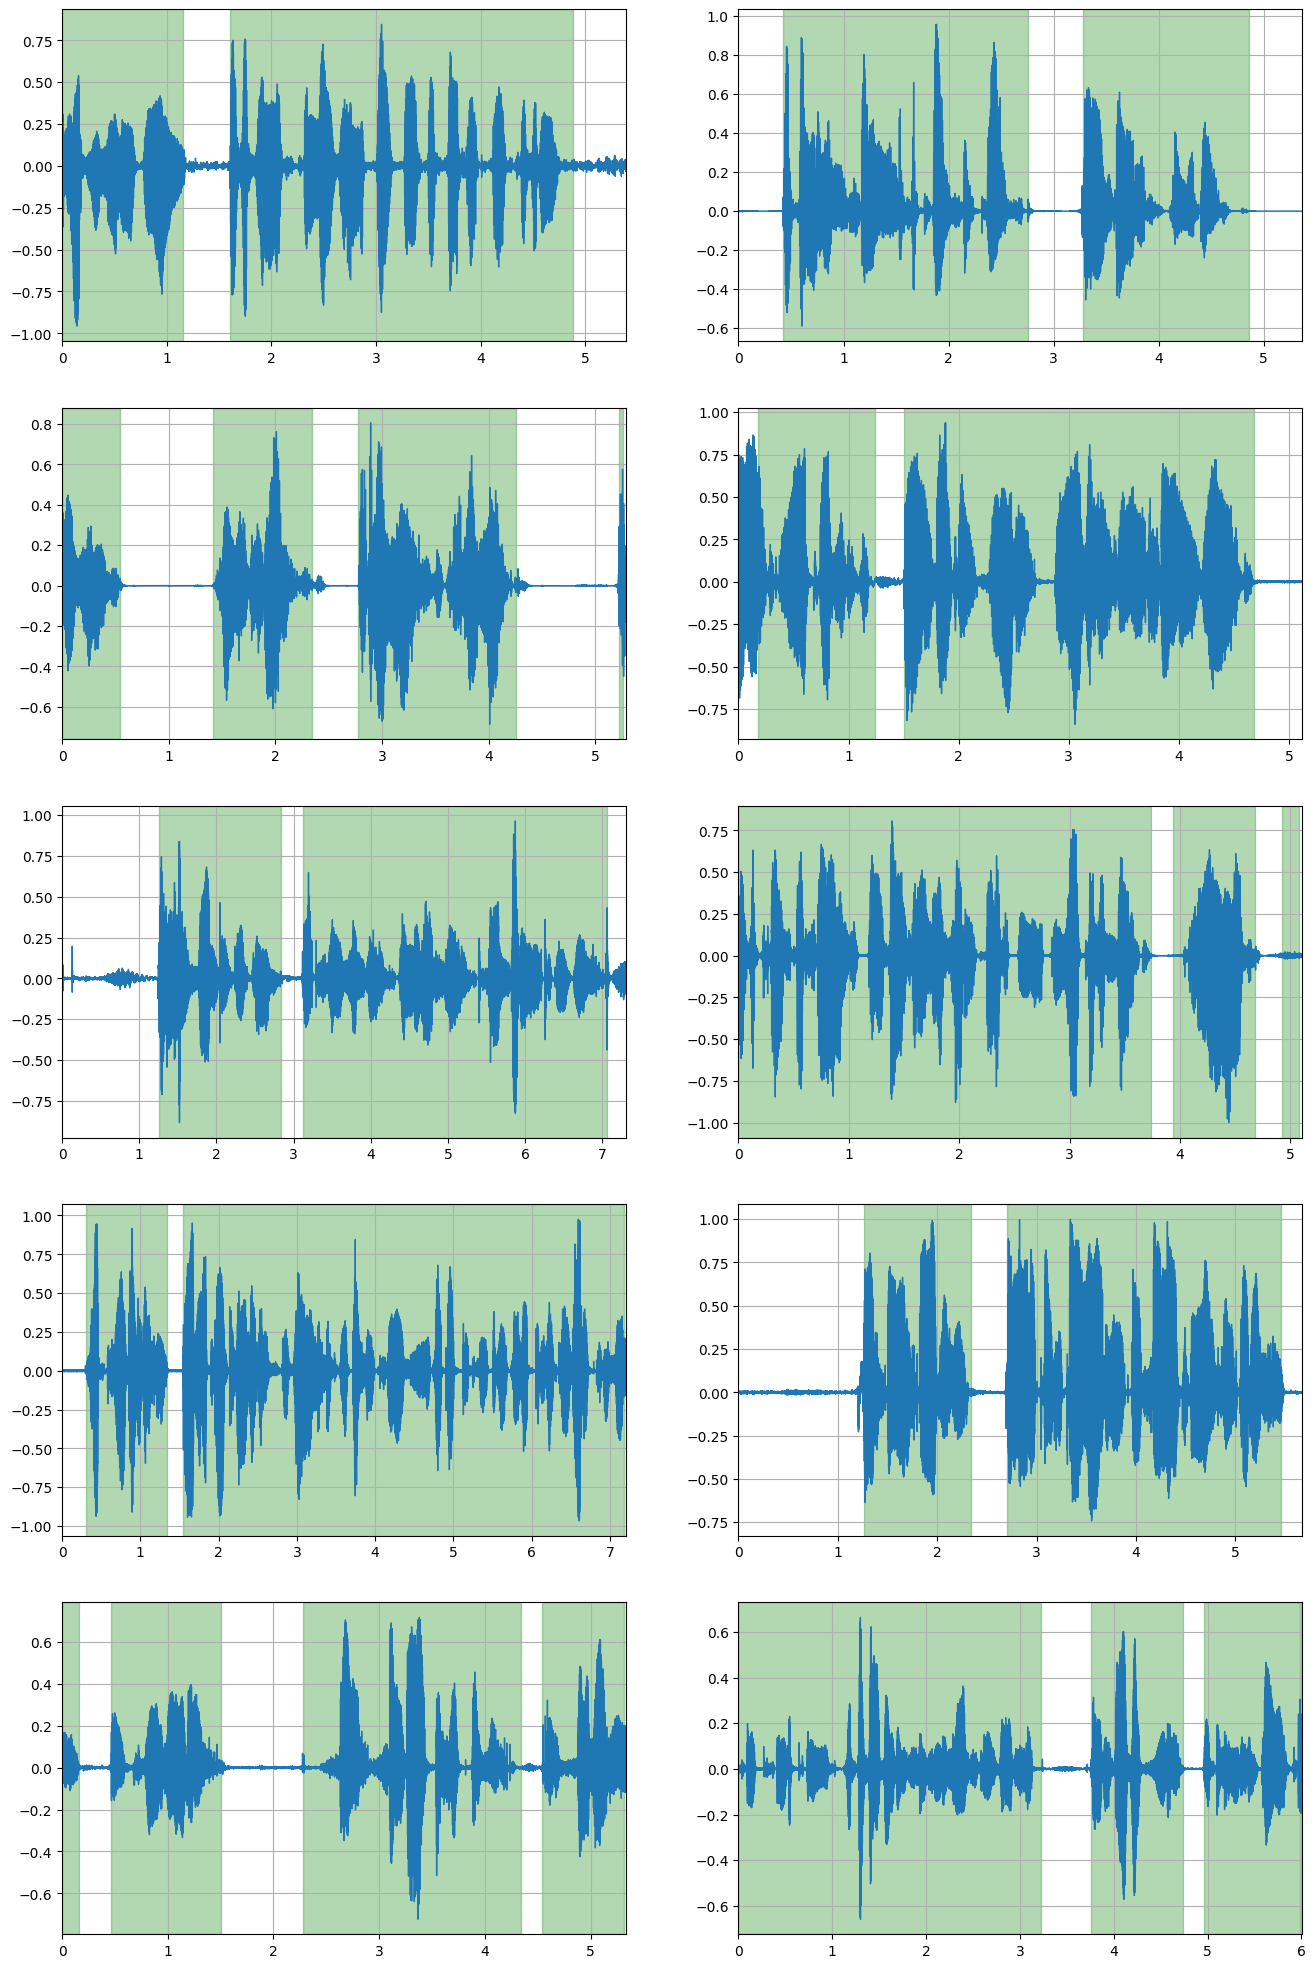

In [20]:
with open("./dataset/output/speech_test/meta.json", "r") as f:
    with open("./dataset/output/speech_test/meta_onnx.json", "r") as f2:
        meta = json.load(f)
        meta2 = json.load(f2)
        random.seed(42)
        keys = list(meta.keys())
        keys.sort()
        rows  = 5
        cols = 2
        figure, axes = plt.subplots(5, 2, figsize=(cols * 8, rows * 5))
        for r in axes:
            for ax in r:

                # Loading
                f = random.choice(keys)
                it = meta[f]
                audio = load_audio('dataset/output/speech_test/' + f)

                # Playing
                play_audio(audio)

                # Plotting
                time_axis = torch.arange(0, len(audio)) / SAMPLE_RATE
                ax.plot(time_axis, audio, linewidth=1)
                ax.grid(True)
                ax.set_xlim(0, len(audio)/SAMPLE_RATE)
                for start, stop in it:
                    ax.axvspan(start, stop, color='green', alpha=0.3)
                # for start, stop in meta2[f]:
                #     ax.axvspan(start, stop, color='blue', alpha=0.3)